In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

df = pd.read_csv("Clean Data\Weekly_United_States_COVID-19_Cases_and_Deaths_by_State_-_ARCHIVED.csv")

# Convert 'date_updated', 'start_date', and 'end_date' columns to datetime
df['date_updated'] = pd.to_datetime(df['date_updated'])
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

#create smaller df for only 2020
filtered_df = df.query('start_date < 2021')

df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0,0,0


In [78]:
tot_cases_week = pd.pivot_table(df, values=['new_cases', 'new_deaths'], index=['start_date'], aggfunc = np.sum)
tot_cases_week = tot_cases_week.reset_index()
tot_cases_week

,start_date,new_cases,new_deaths
0,2020-01-16,6,0
1,2020-01-23,5,0
2,2020-01-30,12,0
3,2020-02-06,13,0
4,2020-02-13,16,0
...,...,...,...
168,2023-04-06,110152,1287
169,2023-04-13,106903,1224
170,2023-04-20,96470,1087
171,2023-04-27,85699,1092


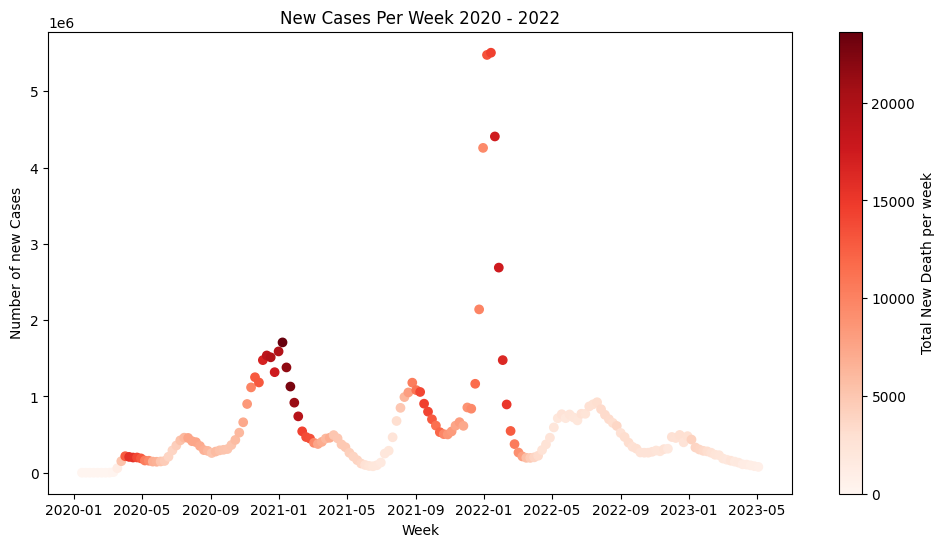

In [97]:
plt.figure(figsize=(12, 6))
plt.scatter(tot_cases_week['start_date'], tot_cases_week['new_cases'], c = tot_cases_week['new_deaths'], cmap='Reds')

plt.colorbar(label='Total New Death per week')
plt.title('New Cases Per Week 2020 - 2022')
plt.xlabel('Week')
plt.ylabel('Number of new Cases')

plt.show()

In [80]:
filtered_df = tot_cases_week.query('start_date < 2021')
filtered_df.head()

,start_date,new_cases,new_deaths
0,2020-01-16,6,0
1,2020-01-23,5,0
2,2020-01-30,12,0
3,2020-02-06,13,0
4,2020-02-13,16,0


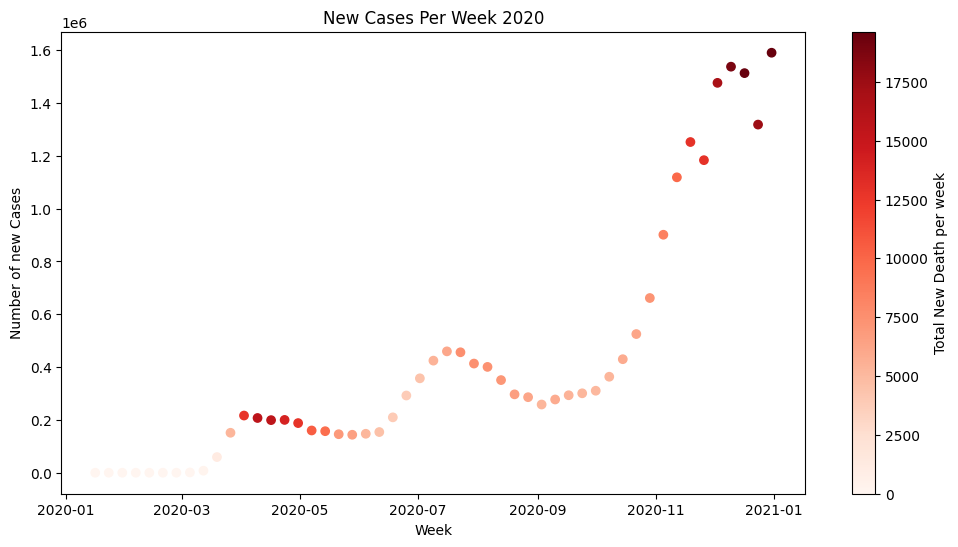

In [96]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['start_date'], filtered_df['new_cases'], c = filtered_df['new_deaths'], cmap='Reds')

plt.colorbar(label='Total New Death per week')
plt.title('New Cases Per Week 2020')
plt.xlabel('Week')
plt.ylabel('Number of new Cases')

plt.show()

In [108]:
totals_df = pd.pivot_table(df, values=['tot_cases', 'tot_deaths'], index=['start_date'], aggfunc = np.sum)
totals_df = totals_df.reset_index()
totals_df.head()



,start_date,tot_cases,tot_deaths
0,2020-01-16,6,0
1,2020-01-23,11,0
2,2020-01-30,23,0
3,2020-02-06,36,0
4,2020-02-13,52,0


In [113]:
state_tots = pd.pivot_table(df, values=['tot_cases', 'tot_deaths'], index=['state'], aggfunc = np.sum)
state_tots = state_tots.sort_values('tot_cases', ascending=False)
state_tots = state_tots.reset_index()
state_tots.head(15)

,state,tot_cases,tot_deaths
0,CA,991993492,10222505
1,TX,727167477,9628506
2,FL,630539188,8141149
3,IL,341584191,4423662
4,PA,295617126,5039309
5,NY,291693261,3479829
6,OH,283677549,4091008
7,NC,280161891,2734097
8,GA,271446025,4144178
9,NYC,255766282,5520330
